Agregar flexibilidad a los scripts de Python

En esta lección, aprenderemos cómo crear aplicaciones de Python utilizando la interfaz de línea de comandos (CLI), es decir, aplicaciones cuyo comportamiento se puede modificar pasando diferentes argumentos y opciones desde la línea de comandos

## Scripts

Hay varias maneras de usar Python. Ejecutar scripts en la línea de comandos es una forma de hacer que tus amigos te consideren un desarrollador o una desarrolladora con experiencia. Un programa Python es un script (o colección de scripts) guardado como un archivo separado para su futura reutilización. Ya has encontrado scripts antes en el capítulo Entornos de desarrollo, donde escribimos un script simple para contar la cantidad de núcleos de nuestra CPU.

Ahora vamos a estudiar otro ejemplo de script llamado image_rotator.py. En este script utilizaremos una nueva librería con la que no has trabajado: la librería PIL. PIL significa Librería de imágenes de Python ("Python Image Library"), la cual utilizan ampliamente los profesionales de datos cuando trabajan con datos de imágenes. En nuestro ejemplo utilizaremos el módulo Image de la librería PIL para leer un archivo de imagen, mostrar su tamaño, girarlo y guardar la imagen en un archivo nuevo..

In [13]:
from PIL import Image
import argparse

im = Image.open('tripleten_logo.png')

print(im.size)

rotated = im.rotate(90)

rotated.save('rotated.png')

(1110, 694)


Ya sabes cómo crear un script de Python. Si guardas el código anterior en un archivo llamado image_rotator.py y lo ejecutas desde la interfaz de la línea de comandos, puedes encontrar un error que dice ModuleNotFoundError: No module named 'PIL'. Este mensaje de error indica que la librería PIL no está instalada en tu sistema. Si deseas instalarla, sigue las instrucciones de la línea de comandos que se proporcionan, las cuales explican cómo hacerlo dependiendo de tu sistema. En resumen, se puede instalar ejecutando estos dos comandos:

python3 -m pip install --upgrade pip

python3 -m pip install --upgrade Pillo
w

Después de instalar la librería, ejecuta el script de Python en un prompt de línea de comandos. Si necesitas recordar, revisa esta lección. Si tanto el script como el archivo de imagen se encuentran en el directorio actual, ejecuta el script de la siguiente manera desde la CLI (interfaz de línea de comandos):

python image_rotato
r.py
y esta es la salida que muestra el tamaño de la imagen:

(1110, 694)
1110 es el ancho de imagen y 694 es la altura de imagen para 'tripleten_logo.jpeg'. Además, nuestro script de Python acaba de guardar esta imagen, pero la giró 90 grados.

Hemos escrito un script de Python y lo ejecutamos en la computadora mediante la línea de comandos, sin embargo, este programa es demasiado inflexible para un uso general. ¿Qué pasa si queremos procesar un archivo de imagen diferente o rotar una imagen en un ángulo diferente? Ahí es donde los argumentos y las opciones entran en juego.vo.

Argumentos

Los argumentos de línea de comandos son similares a los argumentos de una función en Python. Los pasamos a nuestro script posicionalmente incluyéndolos en nuestra sentencia de ejecución de línea de comandos. Los valores de los argumentos pasados se usan dentro del script.

El nombre del archivo de entrada, el ángulo de rotación de la imagen y el nombre del archivo de salida son grandes candidatos para ser argumentos en nuestro script. Para crearlos, podemos utilizar la librería incorporada de Python argparse:

In [18]:
code = """
from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('input_file')
parser.add_argument('output_file')
parser.add_argument('angle', type=int)

args = parser.parse_args()

im = Image.open(args.input_file)
print(im.size)
rotated = im.rotate(args.angle)
rotated.save(args.output_file)
"""
with open("image_rotator.py", "w") as f:
    f.write(code)

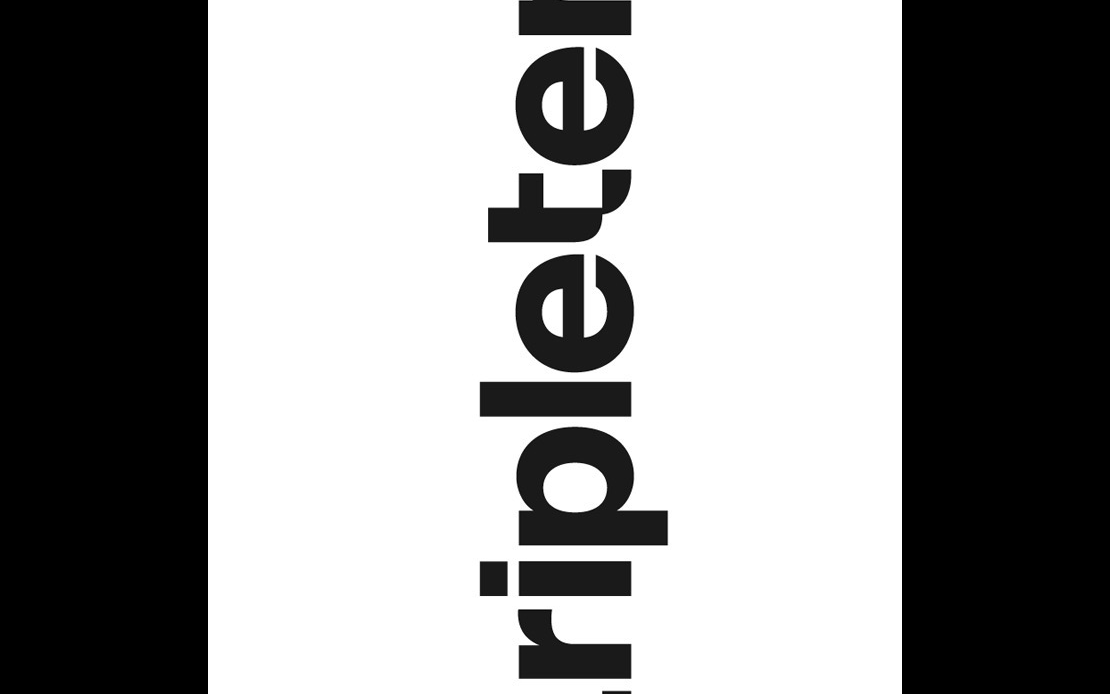

In [22]:
from IPython.display import Image
Image('logo_rotado.png')

Primero iniciamos el analizador sintáctico. Luego creamos tres argumentos: input_file, output_file y angle. Fíjate en que tuvimos que pasar los argumentos en el orden en que los analizamos en nuestro script.

Por defecto, los argumentos se pasan a nuestro script como cadenas. El hecho de especificar type=int para el argumento del ángulo de rotación nos obliga a pasar un valor entero para este argumento; si no lo hacemos, al ejecutar nuestro script obtendremos un error en la línea de comandos.

Por último, args almacena todos los argumentos analizados como atributos: args.input_file, args.output_file y args.angle.

Con estos argumentos, podemos reutilizar el mismo script para cualquier archivo de imagen y ángulo de rotación.

Opciones

Además de argumentos, podemos pasar a nuestro script opciones, que son como argumentos opcionales que podemos añadir para cambiar el funcionamiento de nuestro programa. Al igual que los argumentos de palabras clave en las funciones de Python, las opciones se pueden pasar en cualquier orden.

Las opciones pueden tener formas largas o cortas. Normalmente, para una opción dada, el nombre completo va precedido de dos guiones, mientras que para su forma acortada se utiliza solo la primera letra y un único guion: --option vs -o.

Una opción puede ir seguida de un valor separado por = o simplemente por un espacio vacío. Específicamente, --option=value, --option value, -o=value y -o value hacen el mismo trabajo, que es activar la opción desde la CLI.

Asimismo, una opción puede tener un valor por defecto, lo que resulta útil si no queremos que esta sea obligatoria. Un valor por defecto se especifica con el parámetro default= en add_argument().

La forma en que analizamos las opciones no difiere mucho de los argumentos posicionales. Sus valores pueden obtenerse como atributos del mismo objeto args, y tanto la forma larga como la corta de la misma opción comparten el mismo valor:




#inicializa el analizador sintáctico
parser = argparse.ArgumentParser()

#agrega argumentos con sus nombres correspondientes

parser.add_argument('input_file')
parser.add_argument('output_file')

#observa que a continuación usamos opciones y el valor predeterminado para esta opción
parser.add_argument('--angle', '-a', type=int, default=90)

#analiza los argumentos
args = parser.parse_args()

#carga una imagen del argumento input_file
im = Image.open(args.input_file)

#muestra el tamaño de la imagen
print(im.size)

#gira la imagen en un ángulo proporcionado como argumento
rotated = im.rotate(args.angle)

#guarda la imagen girada usando la ruta de salida de un argumento output_file
rotated.save(args.output_file)

Así es como pasamos a nuestro script un valor para la opción:

$ python image_rotator.py tripleten_logo.jpeg --angle 180 output.p
ng
(694, 1110)


# Flags

Las opciones se emplean con frecuencia para introducir flags, que son opciones booleanas especiales que sólo admiten los valores True/False (es decir, "activado" o "desactivado").

Podemos crear flags de la misma forma que creamos otras opciones, excepto que debemos incluir el parámetro action= en add_argument(). Si definimos action='store_true', el flag se establecerá en False por defecto. Podemos activar el flag (establecerlo en True) simplemente pasándolo a nuestro script desde la línea de comandos. Como los flags solo pueden estar "activados" o "desactivados", nunca tenemos que indicar los valores de los mismos al pasarlos a nuestro script.

Aquí tenemos un ejemplo del flag --info, que controla si se muestra o no la información sobre el tamaño de nuestra image:

# image_rotator.py

from PIL import Image
import agparse

# inicializa el analizador sintáctico
parser = argparse.ArgumetParser()

# agrega argumentos con sus nombres correspondientes
parser.add_argument('input_file')
parser.add_argument('output_file')
parser.add_argument('--angle', '-a', typ
e=nt, default=90)
# observa que a continuación agregamos el indicador --info (o simplemente -i)
parser.add_argument('-i', '--info', acton='store_true')

# analiza los argumentos
args =parser.parse_args()

# carga una imagen del argumento input_file 
im = Imag.open(args.input_file)

# muestra el tamaño de la imagen solo si el indicador --info está establecido en True
if args.info:
    print('dimensiones de la imgen de entrada:', im.size)

# gira la imagen en un ángulo proporcionado como argumento
rtated = im.rotate(args.angle)

# guarda la imagen girada usando la ruta de salida de un argumento output_file
rotated.save(args.output_file)
Incluimos action='store_true', por lo que nuestro flag estará desactivado a menos que lo pasemos explícitamente a nuestro script. Vamos a ejecutar el script con el flag:

python image_rotator.py triple
ten_logo.jpeg --angle 180 output.png -i
dimensiones de la imagen de entrada: (694, 1110)

## Mensajes de ayuda

Cualquier script de Python que ejecutemos desde la línea de comandos tiene incorporada la opción --help (o -h). Podemos añadir a nuestro script mensajes de ayuda útiles usando el parámetro help= en el método add_argument() de argparse.

Añadamos algunos mensajes de ayuda a nuestro script:

#image_rotator.py

from PIL import Image
import argparse

#inicializa el analizador sintáctico
parser = argparse.ArgumentParser()

#agrega argumentos con sus nombres correspondientes
#considera que ahora utilizamos el parámetro help
parser.add_argument('input_file', help='ruta del archivo de entrada')
parser.add_argument('output_file', help='ruta del archivo de salida')
parser.add_argument('--angle', '-a', type=int, default=90, help='rotación en sentido contrario a las agujas del reloj (grados)')
parser.add_argument('-i', '--info', action='store_true', help='muestra el tamaño de la imagen')

#analiza los argumentos
args = parser.parse_args()

#carga una imagen del argumento input_file
im = Image.open(args.input_file)

#muestra el tamaño de la imagen solo si el indicador info está establecido en True
if args.info:
    print('dimensiones de la imagen de entrada:', im.size)

#gira la imagen en un ángulo proporcionado como argumento
rotated = im.rotate(args.angle)

#guarda la imagen girada usando la ruta de salida de un argumento output_file
rotated.save(args.output_file)
Ahora veamos la información de ayuda utilizando la opción h:

$ python image_rotator.py -h

usage: image_rotator.py [-h] [--angle ANGLE] [-i] input_file output_file

positional arguments:
  input_file   input file path
  output_file  output file path

options:
  -h, --help   show this help message and exit
  --angle ANGLE, -a ANGLE   
               counterclockwise rotation (degrees)
  -i, --info   display image size

Pregunta

Supongamos que tenemos el siguiente script de python para trabajar
:
# resizer.py

from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('input_file', help='ruta del archivo de entrada')

im = Image.open(args.input_file)
im.close()
A simple vista podría parecer inútil, ya que solo abre una imagen y no hace nada. Vamos a modificar este script de tal manera que no solo lea una imagen, sino que también la cambie de tamaño y la guarde como un archivo nuevo. Para ello, utilizaremos la librería PIL.

Nuestro objetivo es modificar este script de tal manera que:

tome el width (ancho) y la height (altura) como argumentos posicionales y los coloque en el método im.resize(new_size) como una tupla (width, height);
tome el output_file como un argumento posicional y lo use como una ruta para guardar la imagen resultante.
El uso de este script será el siguiente:
$ python resizer.py input_image.png output_image.png 120 80

¿Qué aspecto tendrá este nu
# opcion 1
ev script modificado?

# resizer.py

from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('input_file', help='ruta del archivo de entrada')
parser.add_argument('output_file', help='ruta del archivo de salida')
parser.add_argument('width', help='ancho deseado', type=int)
parser.add_argument('height', help='altura deseada', type=int)
args = parser.parse_args()

im = Image.open(args.input_file)
new_size = (args.width, args.height)
resized = im.resize(new_size)
r
esized.save(args.output_file)
im.close()
¡Claro que sí! Este
# opcion 2
 sript hace exactamente lo que queremos.

# resizer.py

from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('input_file', help='ruta del archivo de entrada')
parser.add_argument('width', help='ancho deseado', type=int)
parser.add_argument('height', help='altura deseada', type=int)
args = parser.parse_args()

im = Image.open(args.input_file)
new_size = (args.widt
h, args.height)
resized = im.resize(new_size)
im.close()
En el caso de este script, no guardaremos la imagen redimensionada.
 
# opcion 3
Alparecer, si no guardamos este script, no sirve de nada.

# resizer.py

from PIL import Image
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('input_file', help='ruta del archivo de entrada')
parser.add_argument('output_file', help='ruta del archivo de salida')
parser.add_argument('width', help='ancho deseado', type=int)
parser.add_argument('height', help='altura deseada', type=int)
args = parser.parse_args()


im = Image.open(args.input_file)
im.save(args.output_file)
im.close()
Este script es raro. Lee una imagen de entrada y la guarda como una nueva imagen sin siquiera realizar algún cambio.